In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


## 4 Model

### 4.1

couche dense 1: $784*32$

couche dense 2: $32*32$

Total: 26 112

5


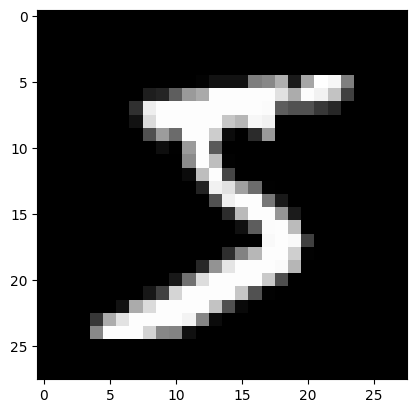

In [2]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

In [3]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()


Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([3, 3, 0, 3, 3, 8, 3, 0, 3, 8, 3, 3, 9, 3, 3, 9, 8, 3, 3, 3, 3, 0,
       8, 3, 8, 3, 0, 0, 3, 9, 3, 3, 3, 9, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3,
       2, 3, 2, 3, 8, 3, 8, 0, 8, 3, 8, 3, 9, 8, 0, 3, 8, 3, 3, 0, 8, 3,
       8, 3, 0, 3, 3, 9, 2, 8, 3, 0, 3, 3, 3, 9, 0, 3, 2, 8, 0, 3, 0, 3,
       8, 8, 9, 9, 7, 3, 3, 3, 9, 3, 0, 3], dtype=int64)

In [5]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

## 5. SGD

In [6]:
## Computing a stochastic gradient

# Source: https://keras.io/guides/writing_a_training_loop_from_scratch/

# Example of gradient computation using automatic differentiation

x_train_batch = x_train[:8]
y_train_batch = y_train[:8]

with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        logits = model(x_train_batch)  # Logits for this minibatch

        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits)

# Use the gradient tape trainableto automatically retrieve
# the gradients of the  variables with respect to the loss.
grad = tape.gradient(loss_value, model.trainable_weights)

## Updating weights

def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)


## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()

2.2578578

In [7]:
def stochastic_gradient_descent(x_train, y_train):

    number = len(x_train)//8   # K: Number of iteration over the data 
    step = 1/np.sqrt(number) 
    loss_list = []

    for k in range(number):
        
        x_train_batch = x_train[k*8:(k+1)*8]
        y_train_batch = y_train[k*8:(k+1)*8]

        with tf.GradientTape() as tape:

            logits = model(x_train_batch) 
            loss_value = loss(y_train_batch, logits)
        
        grad = tape.gradient(loss_value, model.trainable_weights)

        update_weights(model, grad, step)

        samples_for_evaluation = np.random.randint(0, 10000, 1000)
        logits = model(x_train[samples_for_evaluation])
        loss_list.append(loss(y_train[samples_for_evaluation], logits).numpy())

    return loss_list


def update_weights(model, update,step):
    
    new_weights = model.trainable_weights.copy()
    
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] -step*update[i]
    model.set_weights(new_weights)

In [8]:
loss_list = stochastic_gradient_descent(x_train, y_train)

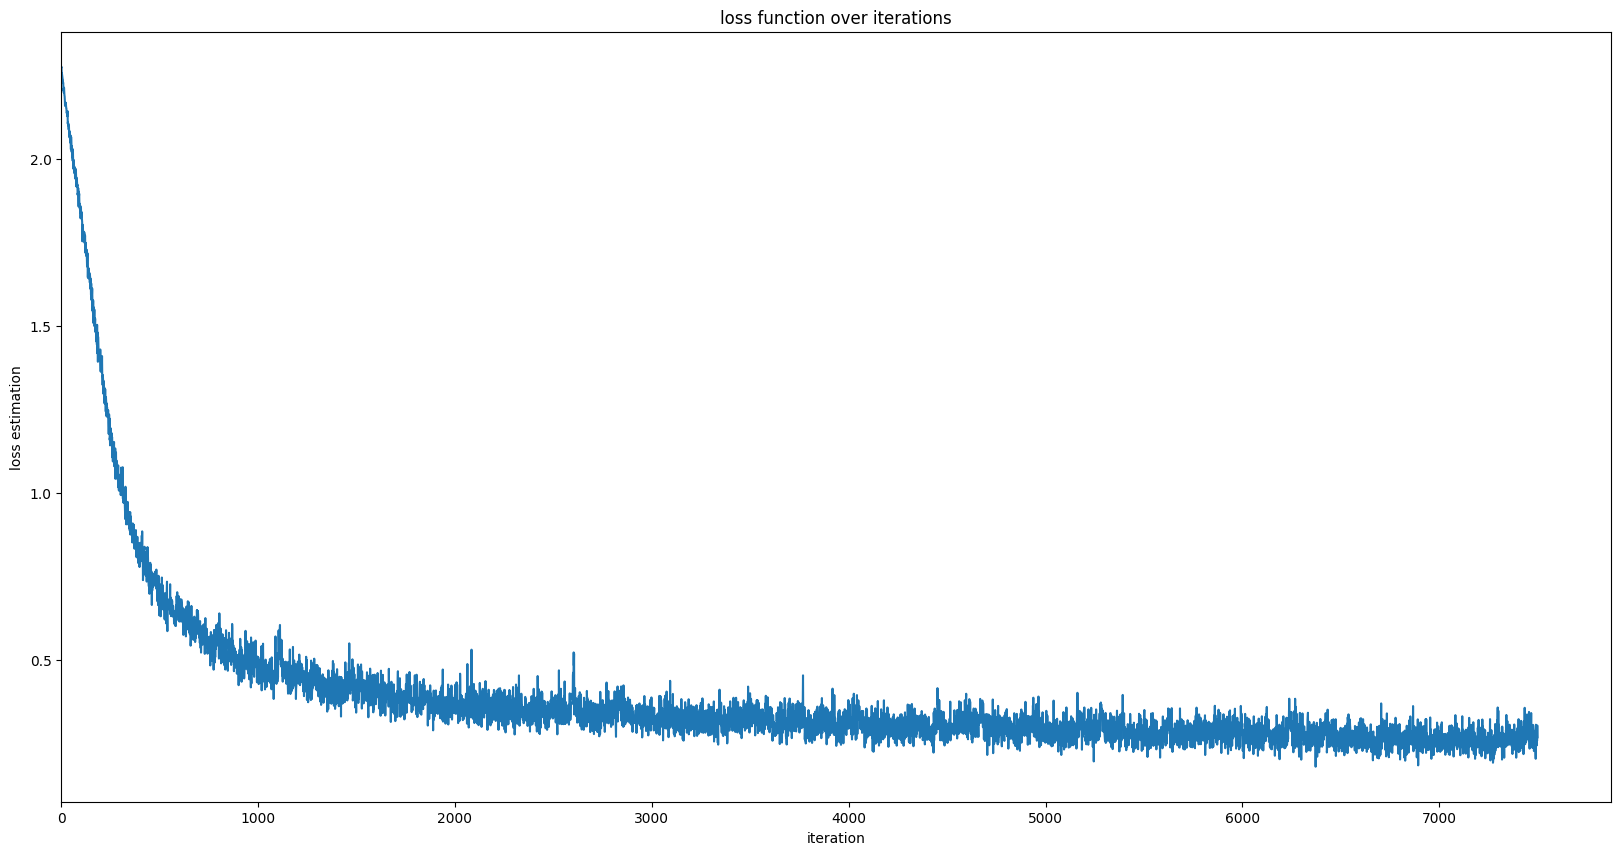

In [9]:
plt.figure(1,figsize=(20,10))
plt.plot(np.arange(len(loss_list)),loss_list,)
plt.title('loss function over iterations')
plt.xlabel('iteration')
plt.xlim(0, None)
plt.ylabel('loss estimation')
plt.show()

## 6. Empirical Risk Minimization

### 6.1 

D'une pierre deux coups, on modifie la fonction précédente pour rajouter un batch size et epoch.

In [10]:
def stochastic_gradient_descent_batch(x_train, y_train, epochs, batch_size):

    number = len(x_train)//batch_size  # K: Number of iteration over the data 

    #step = 1/np.sqrt(number) 
    loss_list = []

    for epoch in range(epochs):

        for k in range(number):
            step = 1/np.sqrt(k+1)
            x_train_batch = x_train[k*batch_size:(k+1)*batch_size]
            y_train_batch = y_train[k*batch_size:(k+1)*batch_size]

            with tf.GradientTape() as tape:

                logits = model(x_train_batch) 
                loss_value = loss(y_train_batch, logits)
        
            grad = tape.gradient(loss_value, model.trainable_weights)
            update_weights(model, grad, step)

            # evaluate model

            if k%200 == 0:
                samples_for_evaluation = np.random.randint(0, 10000, 1000)
                logits = model(x_train[samples_for_evaluation])
                loss_list.append(loss(y_train[samples_for_evaluation], logits).numpy())
        print('epoch:', epoch)

    return loss_list

def update_weights(model, update,step):
    
    new_weights = model.trainable_weights.copy()
    
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] -step*update[i]
    model.set_weights(new_weights)

In [18]:
# Ca met du temps a run, avec 10 epochs et 8 batch_size, du coup je fais que 1 epoch
losses = stochastic_gradient_descent_batch(x_train, y_train, 1, 8)

epoch: 0


# 7 Evaluation on training set

In [20]:

# Predict on training set
y_pred_train = model.predict(x_train)
y_pred_train = np.argmax(y_pred_train, axis=1)  # get the label with highest probability

# Compute accuracy on training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Training accuracy:', train_accuracy)

# Predict on test set
y_pred_test = model.predict(x_test)
y_pred_test = np.argmax(y_pred_test, axis=1)  # get the label with highest probability

# Compute accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print('Test accuracy:', test_accuracy)

1875/1875 [==============================] - 13s 7ms/step
Training accuracy: 0.29973333333333335
313/313 [==============================] - 1s 3ms/step
Test accuracy: 0.2992


Les scores sont assez bas